In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import CondensedNearestNeighbour,EditedNearestNeighbours,TomekLinks,NearMiss,ClusterCentroids
from matplotlib import pyplot
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from imblearn import under_sampling
from typing import Counter
from sklearn.metrics import classification_report
%matplotlib inline


In [37]:
# Surpress warnings:
# import warnings
# def warn(*args, **kwargs):
#     pass
# warnings.warn = warn

In [5]:
def plot_confusion_matrix(y, y_predict, t='Confusion Matrix',cm=None):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    if cm is None:
        cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.heatmap(cm, annot=True, ax=ax, cmap='mako', fmt=',d').set_title(
        t, fontsize=12)
    # sns.color_palette("mako", as_cmap=True)
    ax.set_xlabel('Predicted labels', fontsize=10)
    ax.set_ylabel('True labels', fontsize=10)
    # ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    ax.yaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    plt.show()

In [38]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [8]:
df = pd.read_csv('train40Features.csv')
target = pd.read_csv('train.csv')

In [9]:
#adding target column to our train dataset
df['target'] = target['target']

In [10]:
df.drop('V1',axis = 1, inplace = True) 

In [36]:
columns = ['sex','age','anatomy','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34','V35','V36','target']
df.columns = columns
# df.head()

In [12]:
df['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

<h1> Undersampling Techniques </h1>

In [13]:
x = {}
y = {} 
x_train = {} 
x_test = {} 
y_train = {} 
y_test = {}

In [14]:
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors=450)
# transform the dataset
x['ENN'], y['ENN'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
#converting label to dataframe
y_under = pd.DataFrame(y['ENN'])
#splitting dataset into training and testing sets
x_train['ENN'], x_test['ENN'], y_train['ENN'], y_test['ENN'] = train_test_split(x['ENN'], y['ENN'], 
                                                                                test_size=0.25, random_state=4)
#finding the split of label values in the training and testing sets
print(y_train['ENN'].value_counts(),'\n',y_test['ENN'].value_counts())
#normalizing the data
st_x= StandardScaler()    
x_train['ENN']= st_x.fit_transform(x_train['ENN'])    
x_test['ENN']= st_x.transform(x_test['ENN']) 

0    1174
1     431
Name: target, dtype: int64 
 0    383
1    153
Name: target, dtype: int64


In [15]:
# define the undersampling method
undersample = TomekLinks(sampling_strategy='auto')
# undersample.sampling_strategy_={0:2000, 1:584}
# print(TomekLinks.set_params(sampling_strategy_= 'auto'))
# transform the dataset
x['TL'], y['TL'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
#converting label to dataframe
y_under = pd.DataFrame(y['TL'])
#splitting dataset into training and testing sets
x_train['TL'], x_test['TL'], y_train['TL'], y_test['TL'] = train_test_split(x['TL'], y['TL'], 
                                                                                test_size=0.25, random_state=4)
#finding the split of label values in the training and testing sets
print(y_train['TL'].value_counts(),'\n',y_test['TL'].value_counts())
#normalizing the data
st_x= StandardScaler()    
x_train['TL']= st_x.fit_transform(x_train['TL'])    
x_test['TL']= st_x.transform(x_test['TL']) 

0    24176
1      449
Name: target, dtype: int64 
 0    8074
1     135
Name: target, dtype: int64


In [16]:
# define the undersampling method
undersample = NearMiss(version=1, sampling_strategy={0:1500, 1:584})
# transform the dataset
x['NM'], y['NM'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
#converting label to dataframe
y_under = pd.DataFrame(y['NM'])
#splitting dataset into training and testing sets
x_train['NM'], x_test['NM'], y_train['NM'], y_test['NM'] = train_test_split(x['NM'], y['NM'], 
                                                                                test_size=0.25, random_state=4)
#finding the split of label values in the training and testing sets
print(y_train['NM'].value_counts(),'\n',y_test['NM'].value_counts())
#normalizing the data
st_x= StandardScaler()    
x_train['NM']= st_x.fit_transform(x_train['NM'])    
x_test['NM']= st_x.transform(x_test['NM']) 

0    1127
1     436
Name: target, dtype: int64 
 0    373
1    148
Name: target, dtype: int64


In [17]:
x_train['NM'].std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [18]:
# # define the undersampling method
# undersample = ClusterCentroids(sampling_strategy='auto')
# # transform the dataset
# x['CC'], y['CC'] = undersample.fit_resample(df.drop('target',axis=1),df['target'])
# #converting label to dataframe
# y_under = pd.DataFrame(y['CC'])
# #splitting dataset into training and testing sets
# x_train['CC'], x_test['CC'], y_train['CC'], y_test['CC'] = train_test_split(x['CC'], y['CC'], 
#                                                                                 test_size=0.25, random_state=4)
# #finding the split of label values in the training and testing sets
# print(y_train['CC'].value_counts(),'\n',y_test['CC'].value_counts())
# #normalizing the data
# st_x= StandardScaler()    
# x_train['CC']= st_x.fit_transform(x_train['CC'])    
# x_test['CC']= st_x.transform(x_test['CC']) 

In [19]:
from imblearn import under_sampling
rus = under_sampling.RandomUnderSampler(
    sampling_strategy={0:1500, 1:584})
x['RUS'], y['RUS']= rus.fit_resample(df.drop('target',axis=1),df['target'])
x_train['RUS'], x_test['RUS'], y_train['RUS'], y_test['RUS'] = train_test_split(x['RUS'], y['RUS'],
                                                                            test_size=0.25, random_state=4)
x_train['RUS'] = st_x.fit_transform(x_train['RUS'])
x_test['RUS'] = st_x.transform(x_test['RUS'])
print(Counter(y_train['RUS']))


Counter({0: 1127, 1: 436})


In [20]:
ust = ['ENN', 'TL', 'NM', 'RUS']
for i in ust:
    print(i, x_train[i].shape, x_test[i].shape, y_train[i].shape, y_test[i].shape)
    print(Counter(y_train[i]), Counter(y_test[i]), "\n\n")
    # y_test['TL'].shape


ENN (1605, 39) (536, 39) (1605,) (536,)
Counter({0: 1174, 1: 431}) Counter({0: 383, 1: 153}) 


TL (24625, 39) (8209, 39) (24625,) (8209,)
Counter({0: 24176, 1: 449}) Counter({0: 8074, 1: 135}) 


NM (1563, 39) (521, 39) (1563,) (521,)
Counter({0: 1127, 1: 436}) Counter({0: 373, 1: 148}) 


RUS (1563, 39) (521, 39) (1563,) (521,)
Counter({0: 1127, 1: 436}) Counter({0: 373, 1: 148}) 




In [21]:
def report(yt, y_pred):
    d={"Accuracy": accuracy_score(yt, y_pred),
        "Precision": precision_score(yt, y_pred),
        "Recall": recall_score(yt, y_pred),
        "F1 score":f1_score(yt, y_pred)}
    rep= pd.DataFrame(d, index=[0])
    print(rep)
    

In [22]:
x_train['RUS'].mean(axis=0)

array([ 2.31846958e-16, -1.40926582e-16,  9.77394038e-17,  6.02347489e-17,
       -7.15997958e-17,  1.78203936e-15, -5.22792160e-17, -5.00062066e-17,
        2.68215108e-16, -3.29586362e-15,  8.86473663e-17, -3.71864336e-15,
        4.88697019e-17, -3.88684606e-16,  7.60321641e-16,  5.68252348e-17,
        1.96615312e-16,  3.34132381e-16,  7.27363005e-17, -8.18283381e-17,
        2.95491221e-16, -2.06843855e-16,  7.04632911e-17,  1.95478808e-16,
        1.50018620e-16,  8.52378522e-18, -4.88697019e-17,  2.15935892e-17,
        9.10908514e-16, -8.41013475e-17, -8.68289588e-16, -3.59135484e-16,
       -3.36405390e-16,  2.72761127e-17,  1.03535578e-15,  6.47807677e-17,
       -3.77319559e-16, -1.12741266e-15,  2.02979739e-15])

In [40]:
from sklearn.linear_model import LogisticRegression
cmm = []
ust = ['ENN', 'TL', 'NM', 'RUS']
clf = LogisticRegression()
for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.949627   0.914474  0.908497  0.911475


TL Undersampling :
   Accuracy  Precision  Recall  F1 score
0  0.983555        0.0     0.0       0.0


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.884837   0.872881  0.695946  0.774436


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.771593   0.683544  0.364865  0.475771




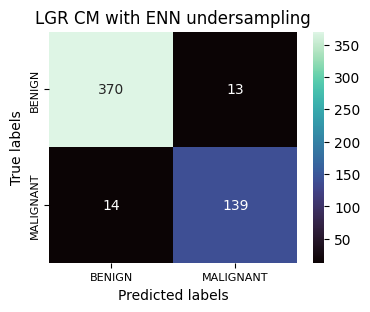

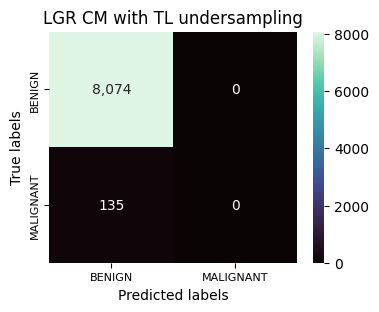

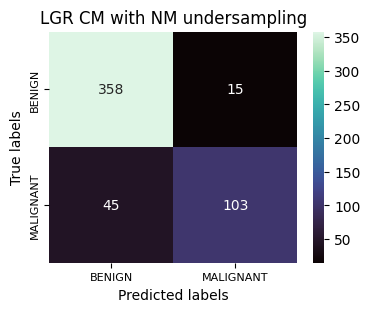

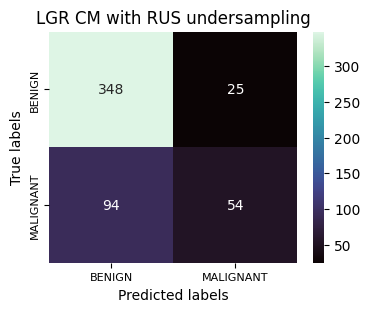

In [41]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'LGR CM with {ust[n]} undersampling', cm=i)


<h1> Decision Tree Model </h1>

In [24]:
ust = ['ENN', 'TL', 'NM', 'RUS']
cmm=[]
clf = DecisionTreeClassifier()
for i in ust:
    clf = clf.fit(x_train[i],y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i],y_pred))
    # print(confusion_matrix(y_test[i],y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    # print("Accuracy:", accuracy_score(y_test[i], y_pred))
    # print("Precision:", precision_score(y_test[i], y_pred))
    # print("Recall:", recall_score(y_test[i], y_pred))
    # print("F1 score:", f1_score(y_test[i], y_pred))
    # print(clf.score(x_test[i],y_test[i]))
    print("\n")
# print(cmm)


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.972015   0.948052  0.954248   0.95114


TL Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.963455   0.054054  0.074074    0.0625


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.873321   0.788732  0.756757  0.772414


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.644914   0.379085  0.391892  0.385382




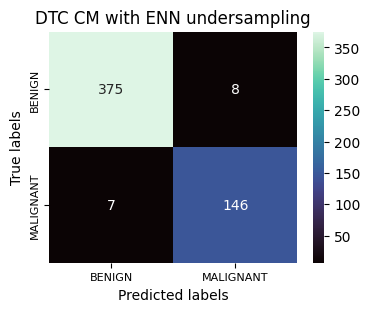

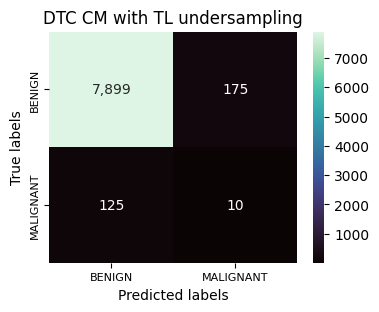

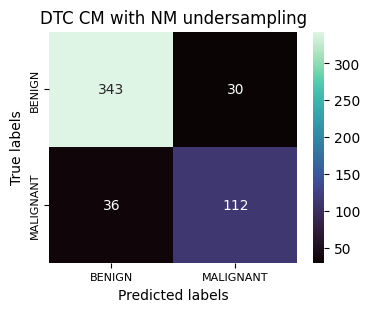

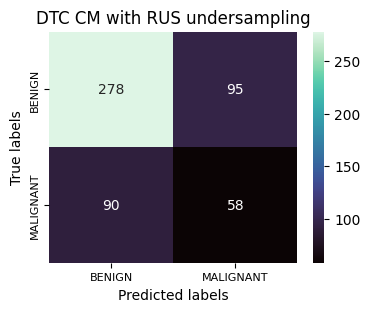

In [25]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'DTC CM with {ust[n]} undersampling', cm=i)


<h1> KNeighbors Classifier <hq>

In [26]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=6)
cmm=[]
for i in ust:
# Train Decision Tree Classifer
    clf = clf.fit(x_train[i],y_train[i])

#Predict the response for test dataset
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i],y_pred))
#Evaluating the model using different metrics
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n\n")

ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.951493   0.950355  0.875817  0.911565



TL Undersampling :
   Accuracy  Precision  Recall  F1 score
0  0.983555        0.0     0.0       0.0



NM Undersampling :
   Accuracy  Precision  Recall  F1 score
0  0.852207   0.961039     0.5  0.657778



RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0   0.71785   0.512195  0.141892  0.222222





c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


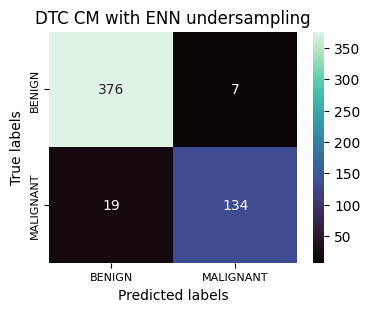

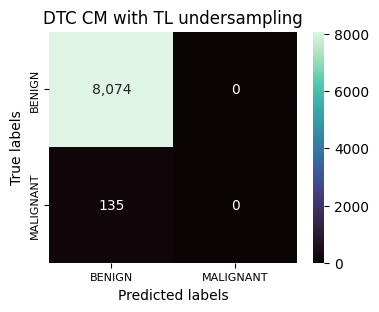

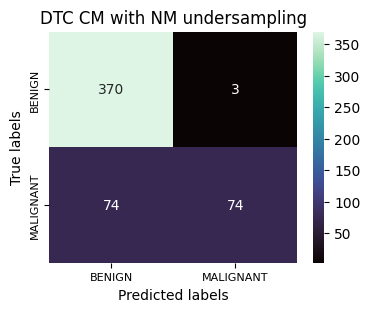

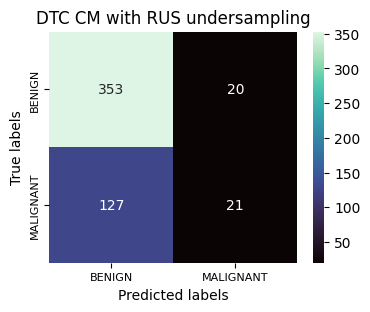

In [27]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'DTC CM with {ust[n]} undersampling', cm=i)


In [32]:
cmm=[]
clf= SVC()
for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.945896   0.913333  0.895425   0.90429


TL Undersampling :
   Accuracy  Precision  Recall  F1 score
0  0.983555        0.0     0.0       0.0


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.890595   0.933333  0.662162  0.774704




c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.746641   0.629032  0.263514  0.371429




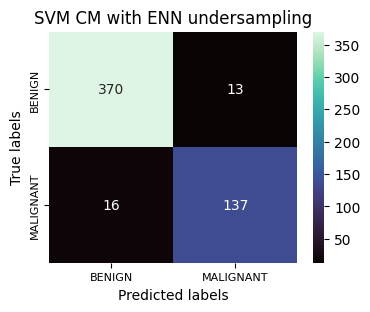

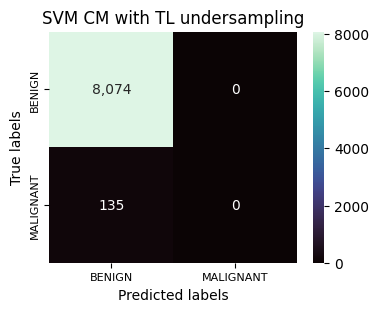

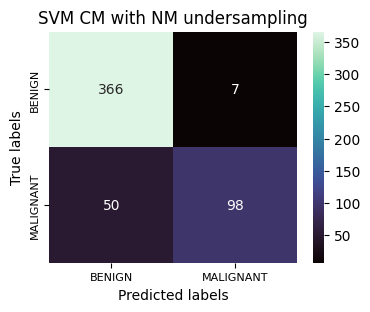

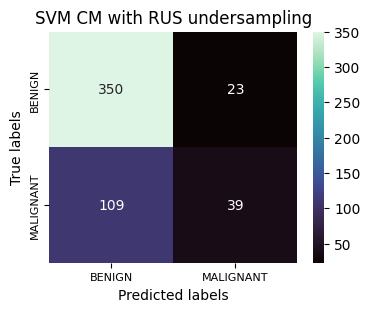

In [33]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'SVM CM with {ust[n]} undersampling', cm=i)

In [45]:
from sklearn.ensemble import RandomForestClassifier
cmm=[]
for i in ust:
    clf= RandomForestClassifier()
    clf=clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")
    

ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.975746   0.960526  0.954248  0.957377


TL Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.983676        0.6  0.022222  0.042857


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.886756    0.87395  0.702703  0.779026


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.738964   0.581081  0.290541  0.387387




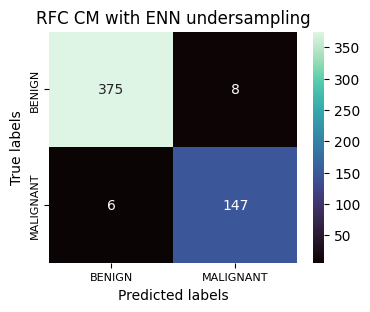

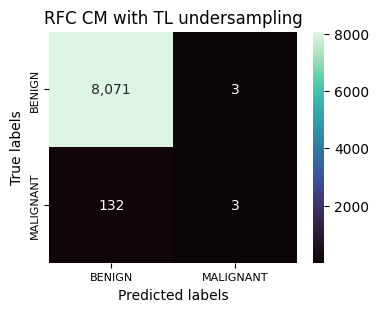

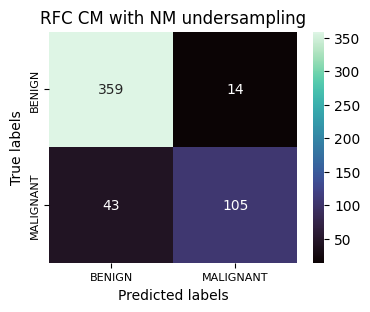

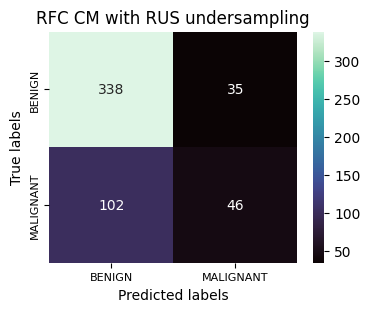

In [43]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'RFC CM with {ust[n]} undersampling', cm=i)
    

In [44]:
from xgboost import XGBClassifier
cmm=[]
ust = ['ENN', 'TL', 'NM', 'RUS']
for i in ust:
    clf = XGBClassifier()
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision   Recall  F1 score
0  0.973881   0.942675  0.96732  0.954839


TL Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.983433   0.428571  0.022222  0.042254


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.892514   0.859375  0.743243  0.797101


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.740883   0.574713  0.337838  0.425532




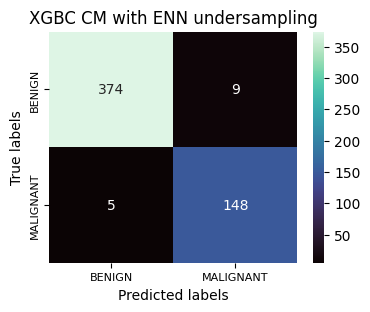

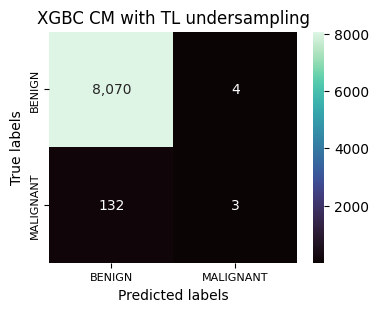

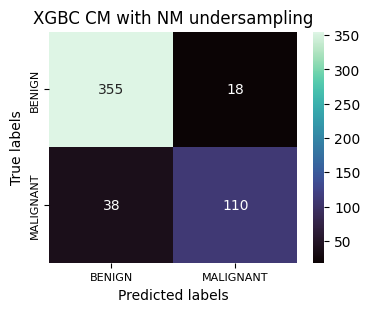

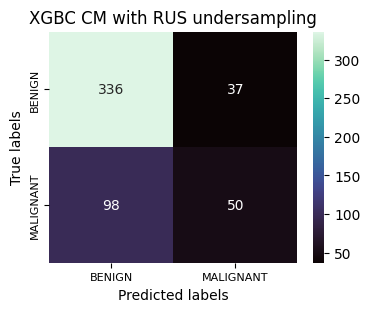

In [29]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'XGBC CM with {ust[n]} undersampling', cm=i)


In [30]:
from lightgbm import LGBMClassifier
cmm=[]
ust = ['ENN', 'TL', 'NM', 'RUS']
clf = LGBMClassifier(learning_rate=0.3, n_estimators=100, num_leaves=100, random_state=42)

for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    # print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


ENN Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.983209   0.967532  0.973856  0.970684


TL Undersampling :
   Accuracy  Precision    Recall  F1 score
0   0.98258   0.214286  0.022222  0.040268


NM Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.898273    0.89916  0.722973  0.801498


RUS Undersampling :
   Accuracy  Precision    Recall  F1 score
0  0.740883   0.568421  0.364865  0.444444




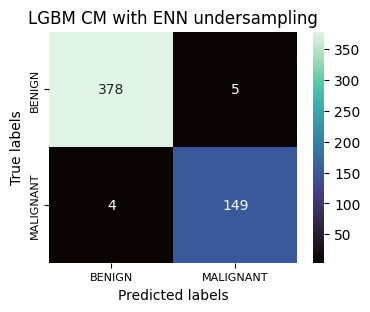

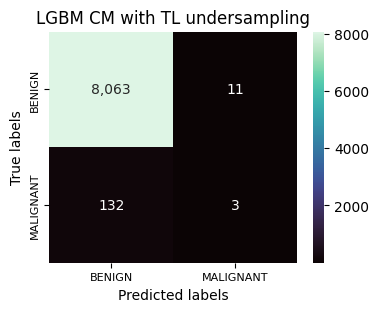

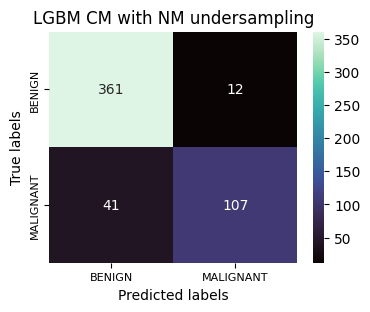

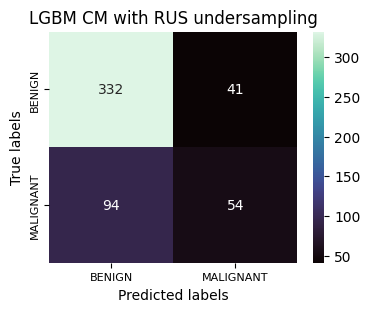

In [31]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'LGBM CM with {ust[n]} undersampling', cm=i)


In [3]:
from sklearn.ensemble import AdaBoostClassifier
cmm = []
ust = ['ENN', 'TL', 'NM', 'RUS']
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")


NameError: name 'x_train' is not defined

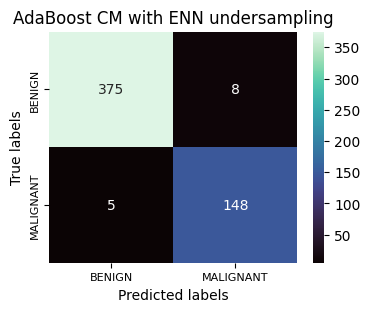

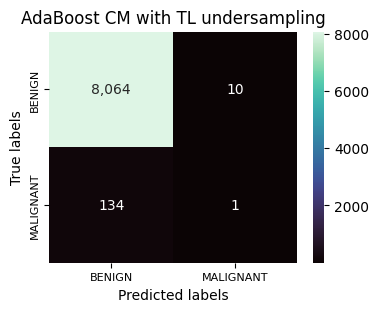

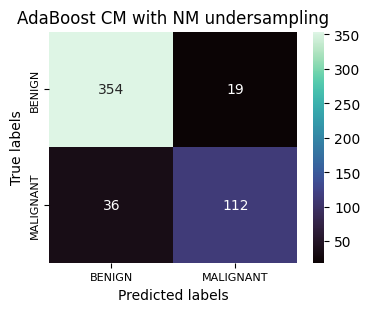

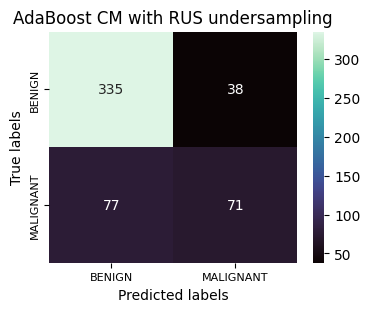

In [32]:
for n, i in enumerate(cmm):
    plot_confusion_matrix(0, 0, t=f'AdaBoost CM with {ust[n]} undersampling', cm=i)

In [2]:
from catboost import CatBoostClassifier as CBC
cmm=[]
clf= CBC()
for i in ust:
    clf = clf.fit(x_train[i], y_train[i])
    y_pred = clf.predict(x_test[i])
    cmm.append(confusion_matrix(y_test[i], y_pred))
    print(confusion_matrix(y_test[i], y_pred))
    print(i+" Undersampling :")
    report(y_test[i], y_pred)
    print("\n")
